# Champlin Smith DSC630 Week 8

In [1]:
import pandas as pd

file_path = f"C:\\Users\\champ\\OneDrive\\Documents\\MS Data Science\\DSC680 Applied Data Science\\DSC680\\Retail Sales\\us_retail_sales.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [2]:
df_melted = df.melt(id_vars='YEAR', var_name='Month', value_name='Value')
df_melted.head()


,YEAR,Month,Value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [3]:
# Map month abbreviations to month numbers
month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY':5, 'JUN':6,
             'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}

df_melted['MonthNum'] = df_melted['Month'].map(month_map)

# Create a datetime column using YEAR and MonthNum
df_melted['Date'] = pd.to_datetime(dict(year=df_melted['YEAR'], month=df_melted['MonthNum'], day=1))
df_melted = df_melted.drop(columns=['YEAR', 'Month', 'MonthNum'])

df_melted.head()


,Value,Date
0,146925.0,1992-01-01
1,157555.0,1993-01-01
2,167518.0,1994-01-01
3,182413.0,1995-01-01
4,189135.0,1996-01-01


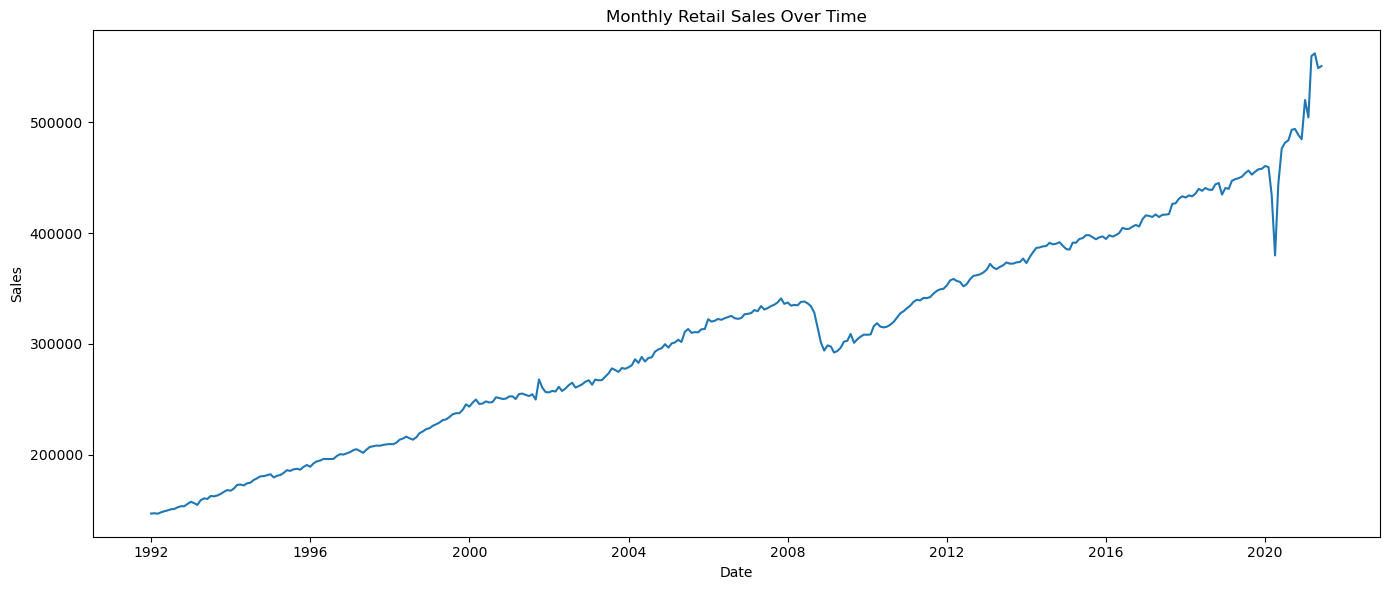

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_melted, x='Date', y='Value')
plt.title('Monthly Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


In [5]:
# Define cutoff date
cutoff_date = pd.Timestamp('2020-6-30')

# Split into train (up to July 2020) and test (after)
train_data = df_melted[df_melted['Date'] <= cutoff_date].copy()
test_data = df_melted[df_melted['Date'] > cutoff_date].copy()


In [6]:
import statsmodels.api as sm

# Convert Date to ordinal (numeric) for regression
train_data['DateOrdinal'] = train_data['Date'].map(pd.Timestamp.toordinal)

X_train = sm.add_constant(train_data['DateOrdinal'])
y_train = train_data['Value'].astype(float)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())
import statsmodels.api as sm

# Convert Date to ordinal (numeric) for regression
train_data['DateOrdinal'] = train_data['Date'].map(pd.Timestamp.toordinal)

X_train = sm.add_constant(train_data['DateOrdinal'])
y_train = train_data['Value'].astype(float)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          1.37e-286
Time:                        20:59:02   Log-Likelihood:                -3716.6
No. Observations:                 342   AIC:                             7437.
Df Residuals:                     340   BIC:                             7445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.071e+07   1.68e+05   -123.486      

In [7]:
# Keep only test rows with known (non-null) values
test_data_nonan = test_data.dropna(subset=['Value']).copy()

test_data_nonan['DateOrdinal'] = test_data_nonan['Date'].map(pd.Timestamp.toordinal)

X_test = sm.add_constant(test_data_nonan['DateOrdinal'])
y_test = test_data_nonan['Value'].astype(float)

y_pred = model.predict(X_test)

test_data_nonan['Predicted'] = y_pred

print(test_data_nonan[['Date', 'Value', 'Predicted']])


          Date     Value      Predicted
29  2021-01-01  520162.0  454727.951904
59  2021-02-01  504458.0  455617.140359
89  2021-03-01  559871.0  456420.278317
119 2021-04-01  562269.0  457309.466772
149 2021-05-01  548987.0  458169.971728
179 2021-06-01  550782.0  459059.160183
208 2020-07-01  481627.0  449450.188174
238 2020-08-01  483716.0  450339.376629
268 2020-09-01  493327.0  451228.565083
298 2020-10-01  493991.0  452089.070039
328 2020-11-01  488652.0  452978.258494
358 2020-12-01  484782.0  453838.763450


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_data_nonan['Value'], test_data_nonan['Predicted']))
print(f"RMSE on test data: {rmse:.2f}")


RMSE on test data: 66429.10
